
Training/Testing Split: 90%/10%

Model: ZeroR
 Accuracy: 0.5939, Precision: 0.9188, Recall: 0.2000, F1-Score: 0.1490, Specificity: 0.8000
Time taken: 0.06 seconds

Model: Random Forest
 Accuracy: 0.8003, Precision: 0.8318, Recall: 0.6245, F1-Score: 0.6984, Specificity: 0.9225
Time taken: 85.75 seconds

Model: Decision Tree
 Accuracy: 0.7347, Precision: 0.6064, Recall: 0.6141, F1-Score: 0.6101, Specificity: 0.9100
Time taken: 5.53 seconds

Model: Extra Trees
 Accuracy: 0.7945, Precision: 0.8207, Recall: 0.6243, F1-Score: 0.6956, Specificity: 0.9186
Time taken: 44.82 seconds

Results saved to results/results_split_90_10.csv
Confusion Matrix for ZeroR saved to results/conf_matrix_90_10_ZeroR.csv
Confusion Matrix for Random Forest saved to results/conf_matrix_90_10_Random_Forest.csv
Confusion Matrix for Decision Tree saved to results/conf_matrix_90_10_Decision_Tree.csv
Confusion Matrix for Extra Trees saved to results/conf_matrix_90_10_Extra_Trees.csv


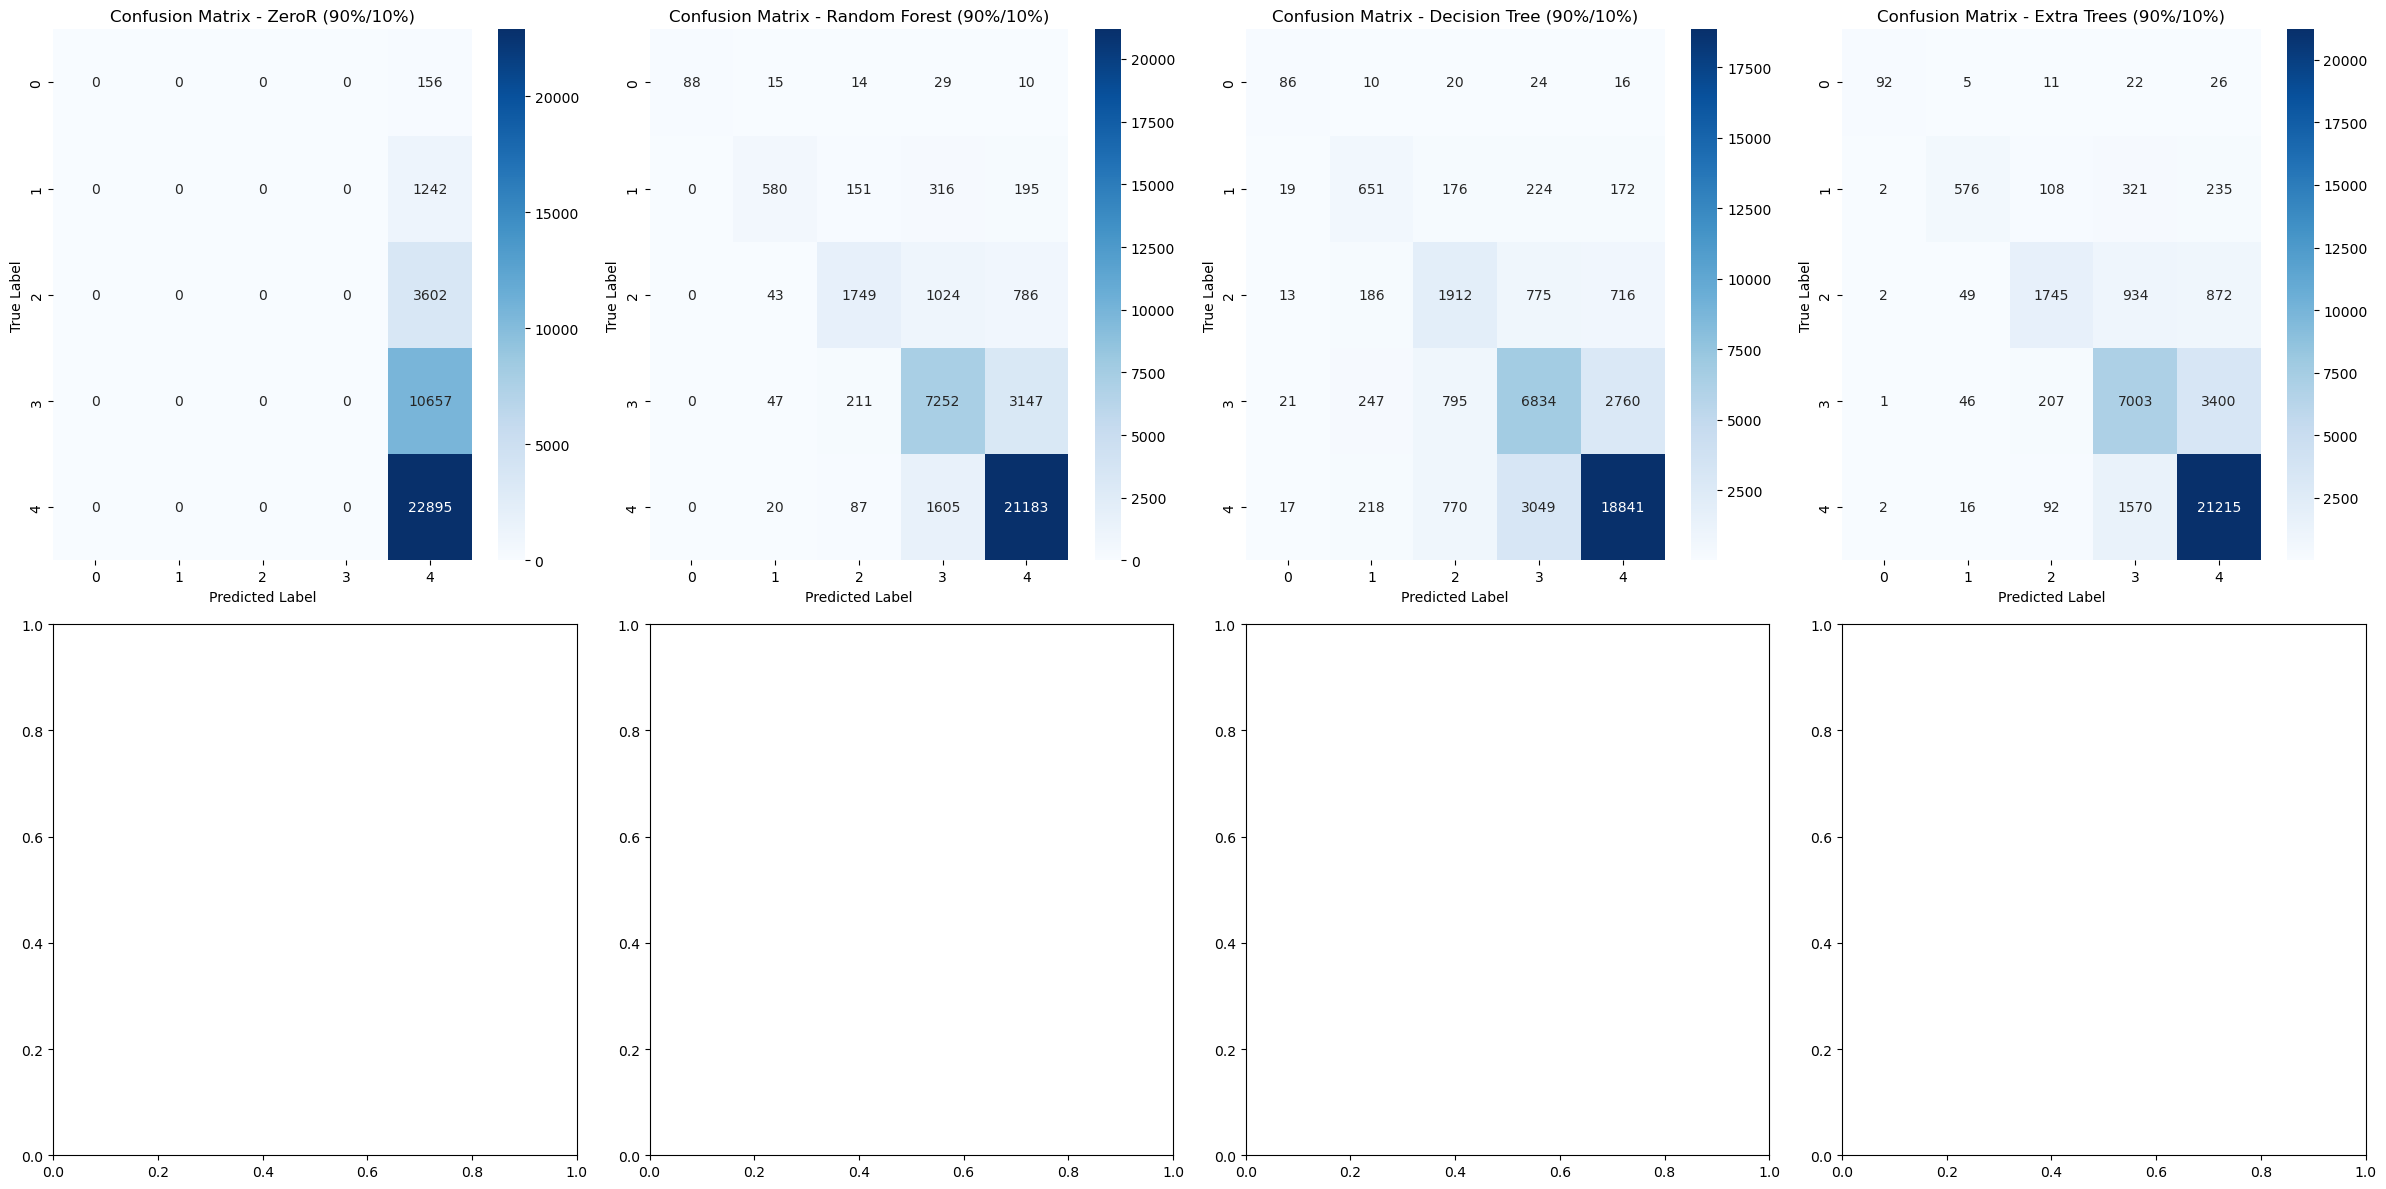


Training/Testing Split: 80%/20%

Model: ZeroR
 Accuracy: 0.5938, Precision: 0.9188, Recall: 0.2000, F1-Score: 0.1490, Specificity: 0.8000
Time taken: 0.09 seconds

Model: Random Forest
 Accuracy: 0.7867, Precision: 0.8146, Recall: 0.6006, F1-Score: 0.6750, Specificity: 0.9166
Time taken: 77.07 seconds

Model: Decision Tree
 Accuracy: 0.7208, Precision: 0.5807, Recall: 0.6007, F1-Score: 0.5902, Specificity: 0.9050
Time taken: 4.87 seconds

Model: Extra Trees
 Accuracy: 0.7852, Precision: 0.8085, Recall: 0.6036, F1-Score: 0.6761, Specificity: 0.9146
Time taken: 37.73 seconds

Results saved to results/results_split_80_20.csv
Confusion Matrix for ZeroR saved to results/conf_matrix_80_20_ZeroR.csv
Confusion Matrix for Random Forest saved to results/conf_matrix_80_20_Random_Forest.csv
Confusion Matrix for Decision Tree saved to results/conf_matrix_80_20_Decision_Tree.csv
Confusion Matrix for Extra Trees saved to results/conf_matrix_80_20_Extra_Trees.csv


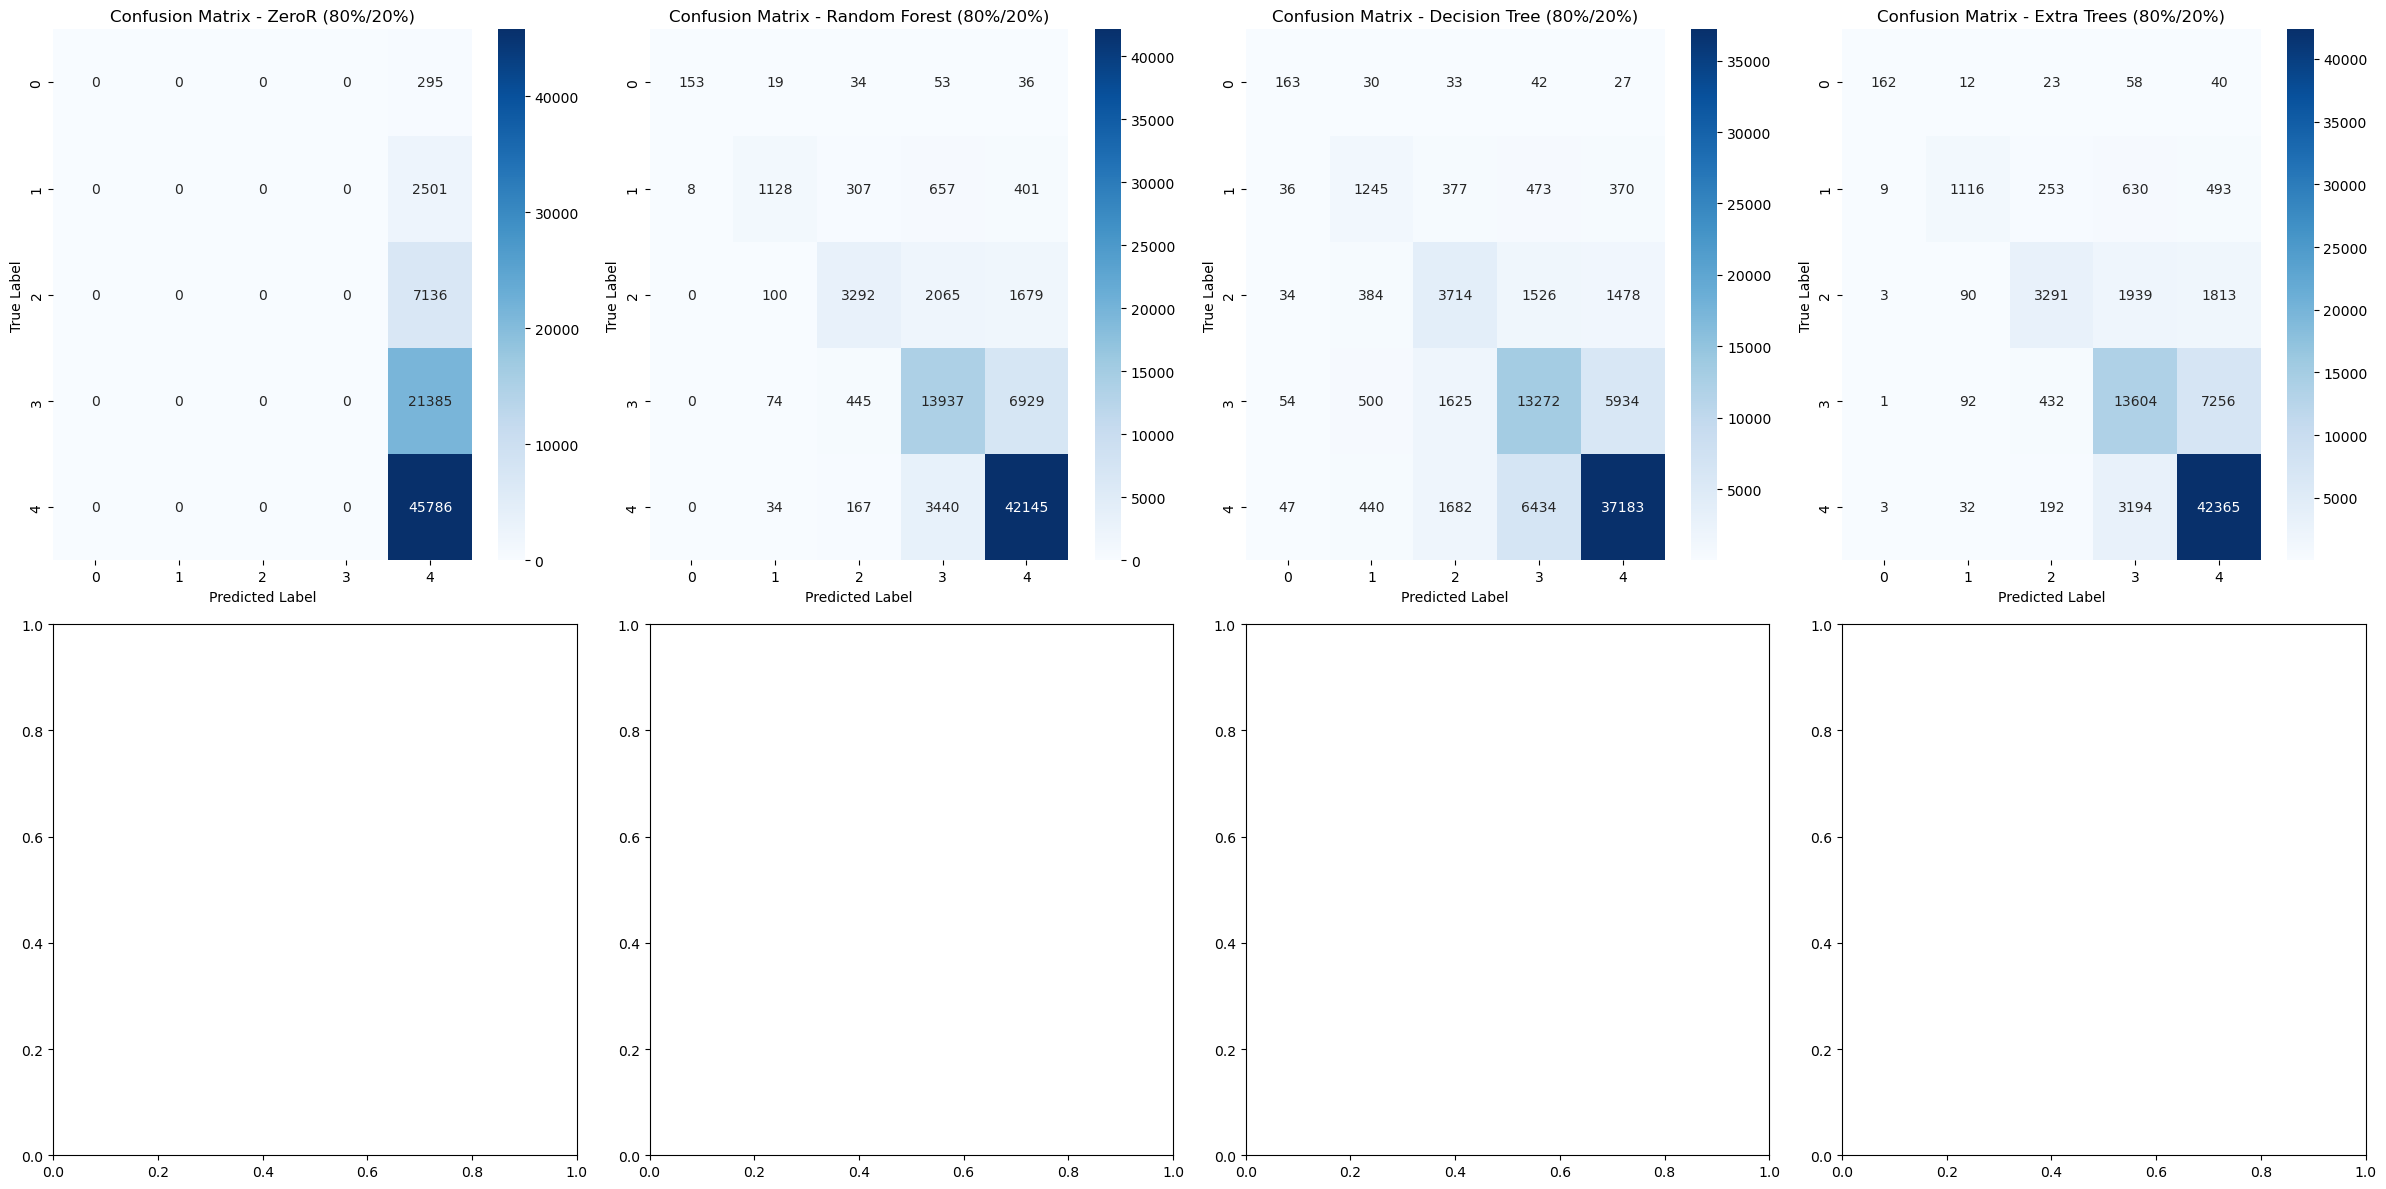


Training/Testing Split: 70%/30%

Model: ZeroR
 Accuracy: 0.5932, Precision: 0.9186, Recall: 0.2000, F1-Score: 0.1489, Specificity: 0.8000
Time taken: 0.13 seconds

Model: Random Forest
 Accuracy: 0.7744, Precision: 0.7997, Recall: 0.5744, F1-Score: 0.6492, Specificity: 0.9116
Time taken: 68.28 seconds

Model: Decision Tree
 Accuracy: 0.7004, Precision: 0.5548, Recall: 0.5669, F1-Score: 0.5607, Specificity: 0.8982
Time taken: 4.35 seconds

Model: Extra Trees
 Accuracy: 0.7700, Precision: 0.7804, Recall: 0.5749, F1-Score: 0.6450, Specificity: 0.9081
Time taken: 33.46 seconds

Results saved to results/results_split_70_30.csv
Confusion Matrix for ZeroR saved to results/conf_matrix_70_30_ZeroR.csv
Confusion Matrix for Random Forest saved to results/conf_matrix_70_30_Random_Forest.csv
Confusion Matrix for Decision Tree saved to results/conf_matrix_70_30_Decision_Tree.csv
Confusion Matrix for Extra Trees saved to results/conf_matrix_70_30_Extra_Trees.csv


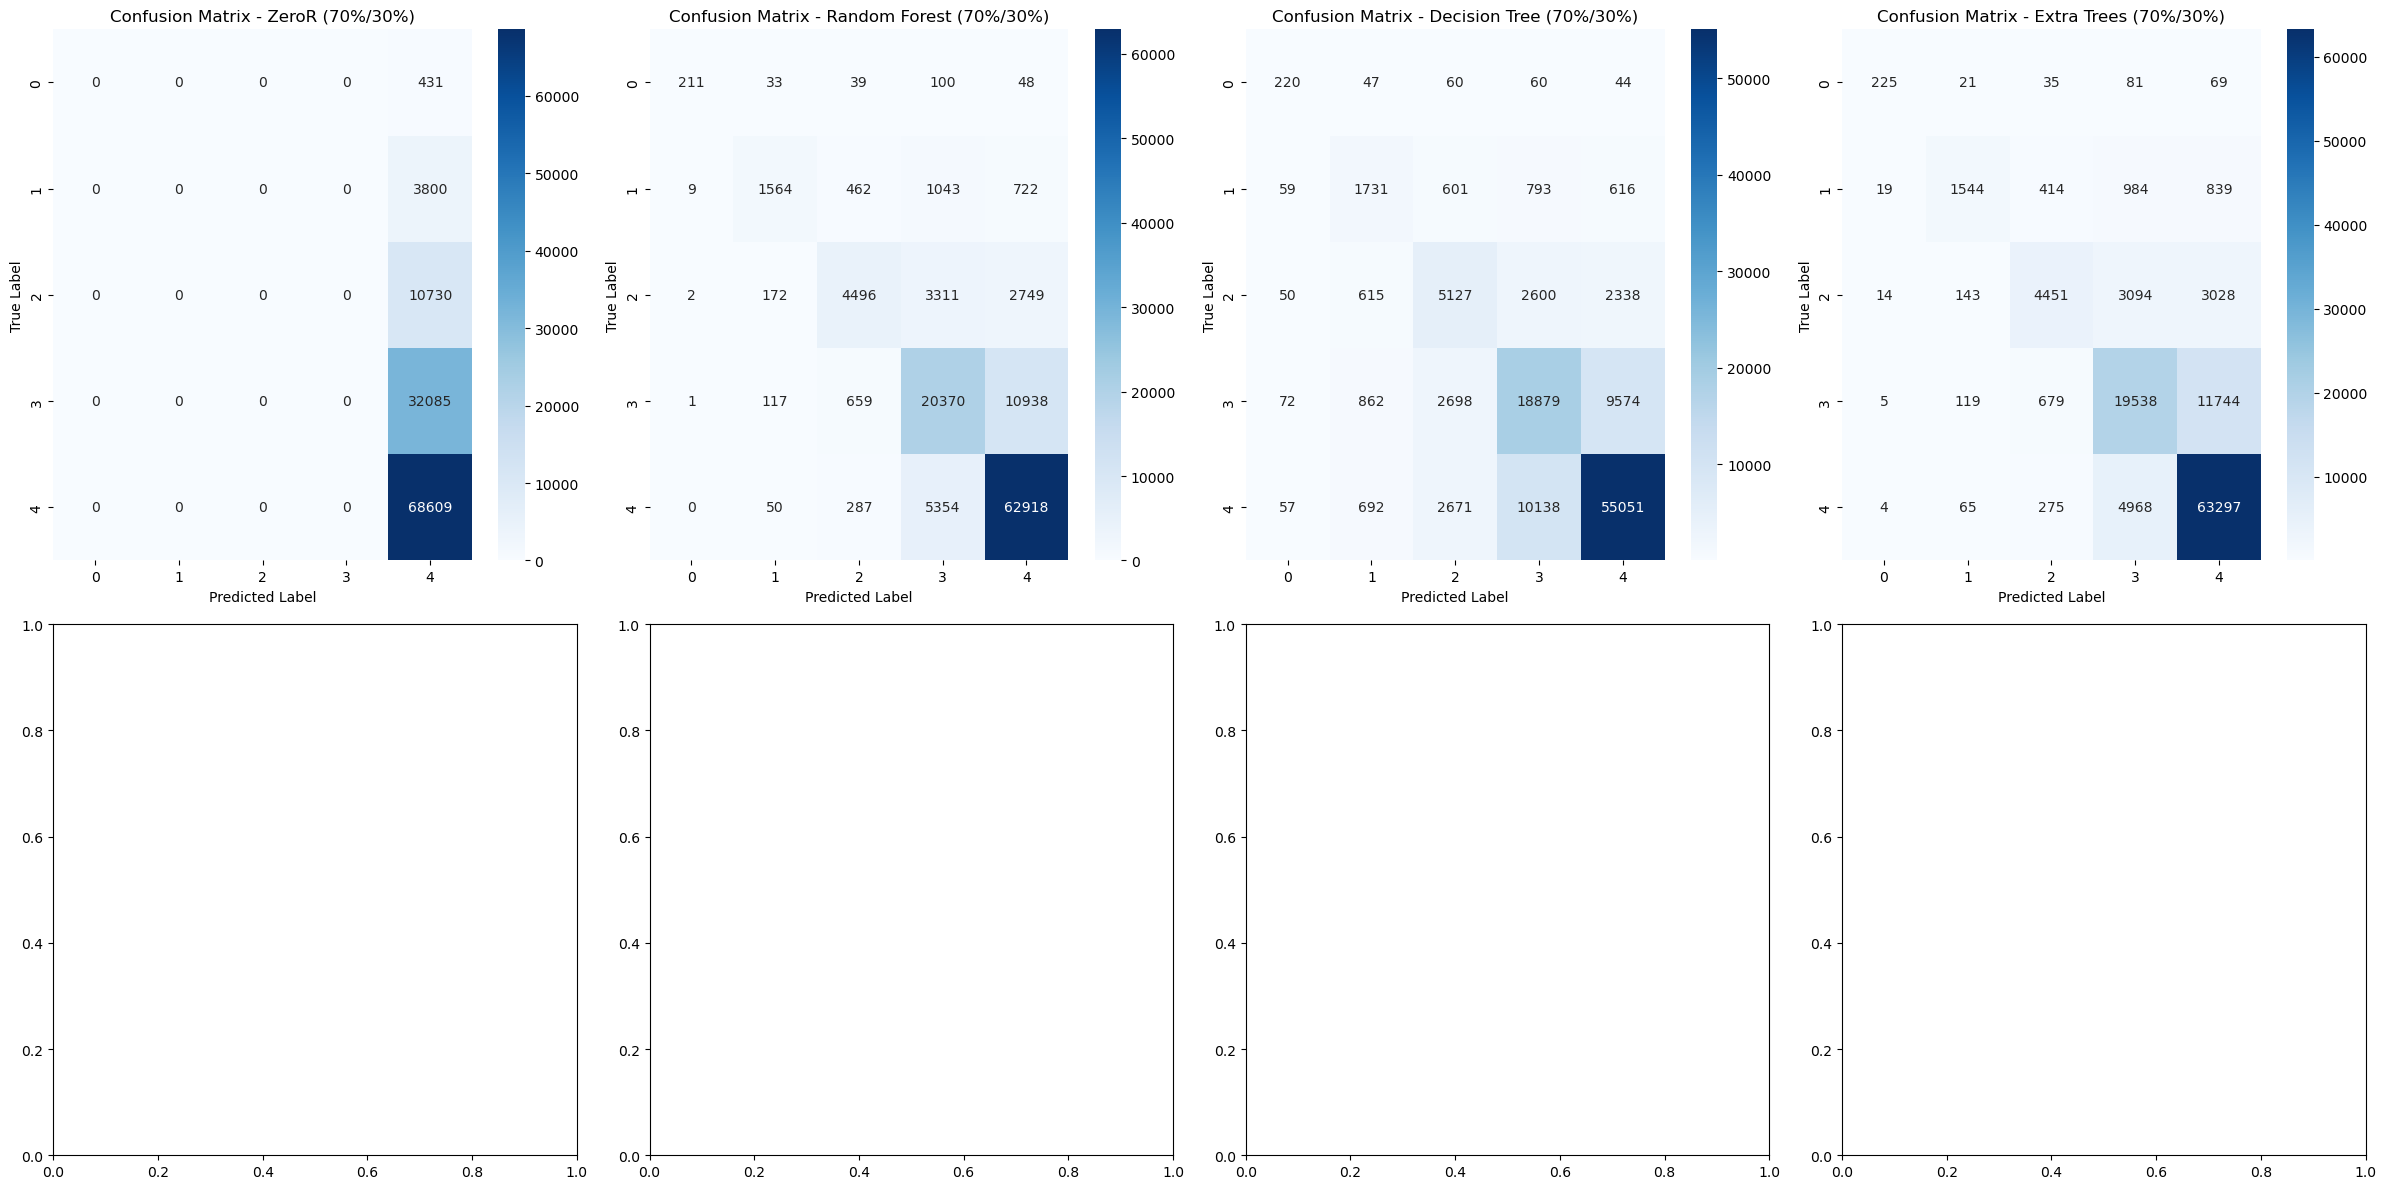


Training/Testing Split: 50%/50%

Model: ZeroR
 Accuracy: 0.5945, Precision: 0.9189, Recall: 0.2000, F1-Score: 0.1491, Specificity: 0.8000
Time taken: 0.24 seconds

Model: Random Forest
 Accuracy: 0.7459, Precision: 0.7591, Recall: 0.5112, F1-Score: 0.5836, Specificity: 0.9007
Time taken: 50.16 seconds

Model: Decision Tree
 Accuracy: 0.6629, Precision: 0.4934, Recall: 0.5082, F1-Score: 0.5004, Specificity: 0.8853
Time taken: 3.16 seconds

Model: Extra Trees
 Accuracy: 0.7411, Precision: 0.7380, Recall: 0.5167, F1-Score: 0.5855, Specificity: 0.8969
Time taken: 25.68 seconds

Results saved to results/results_split_50_50.csv
Confusion Matrix for ZeroR saved to results/conf_matrix_50_50_ZeroR.csv
Confusion Matrix for Random Forest saved to results/conf_matrix_50_50_Random_Forest.csv
Confusion Matrix for Decision Tree saved to results/conf_matrix_50_50_Decision_Tree.csv
Confusion Matrix for Extra Trees saved to results/conf_matrix_50_50_Extra_Trees.csv


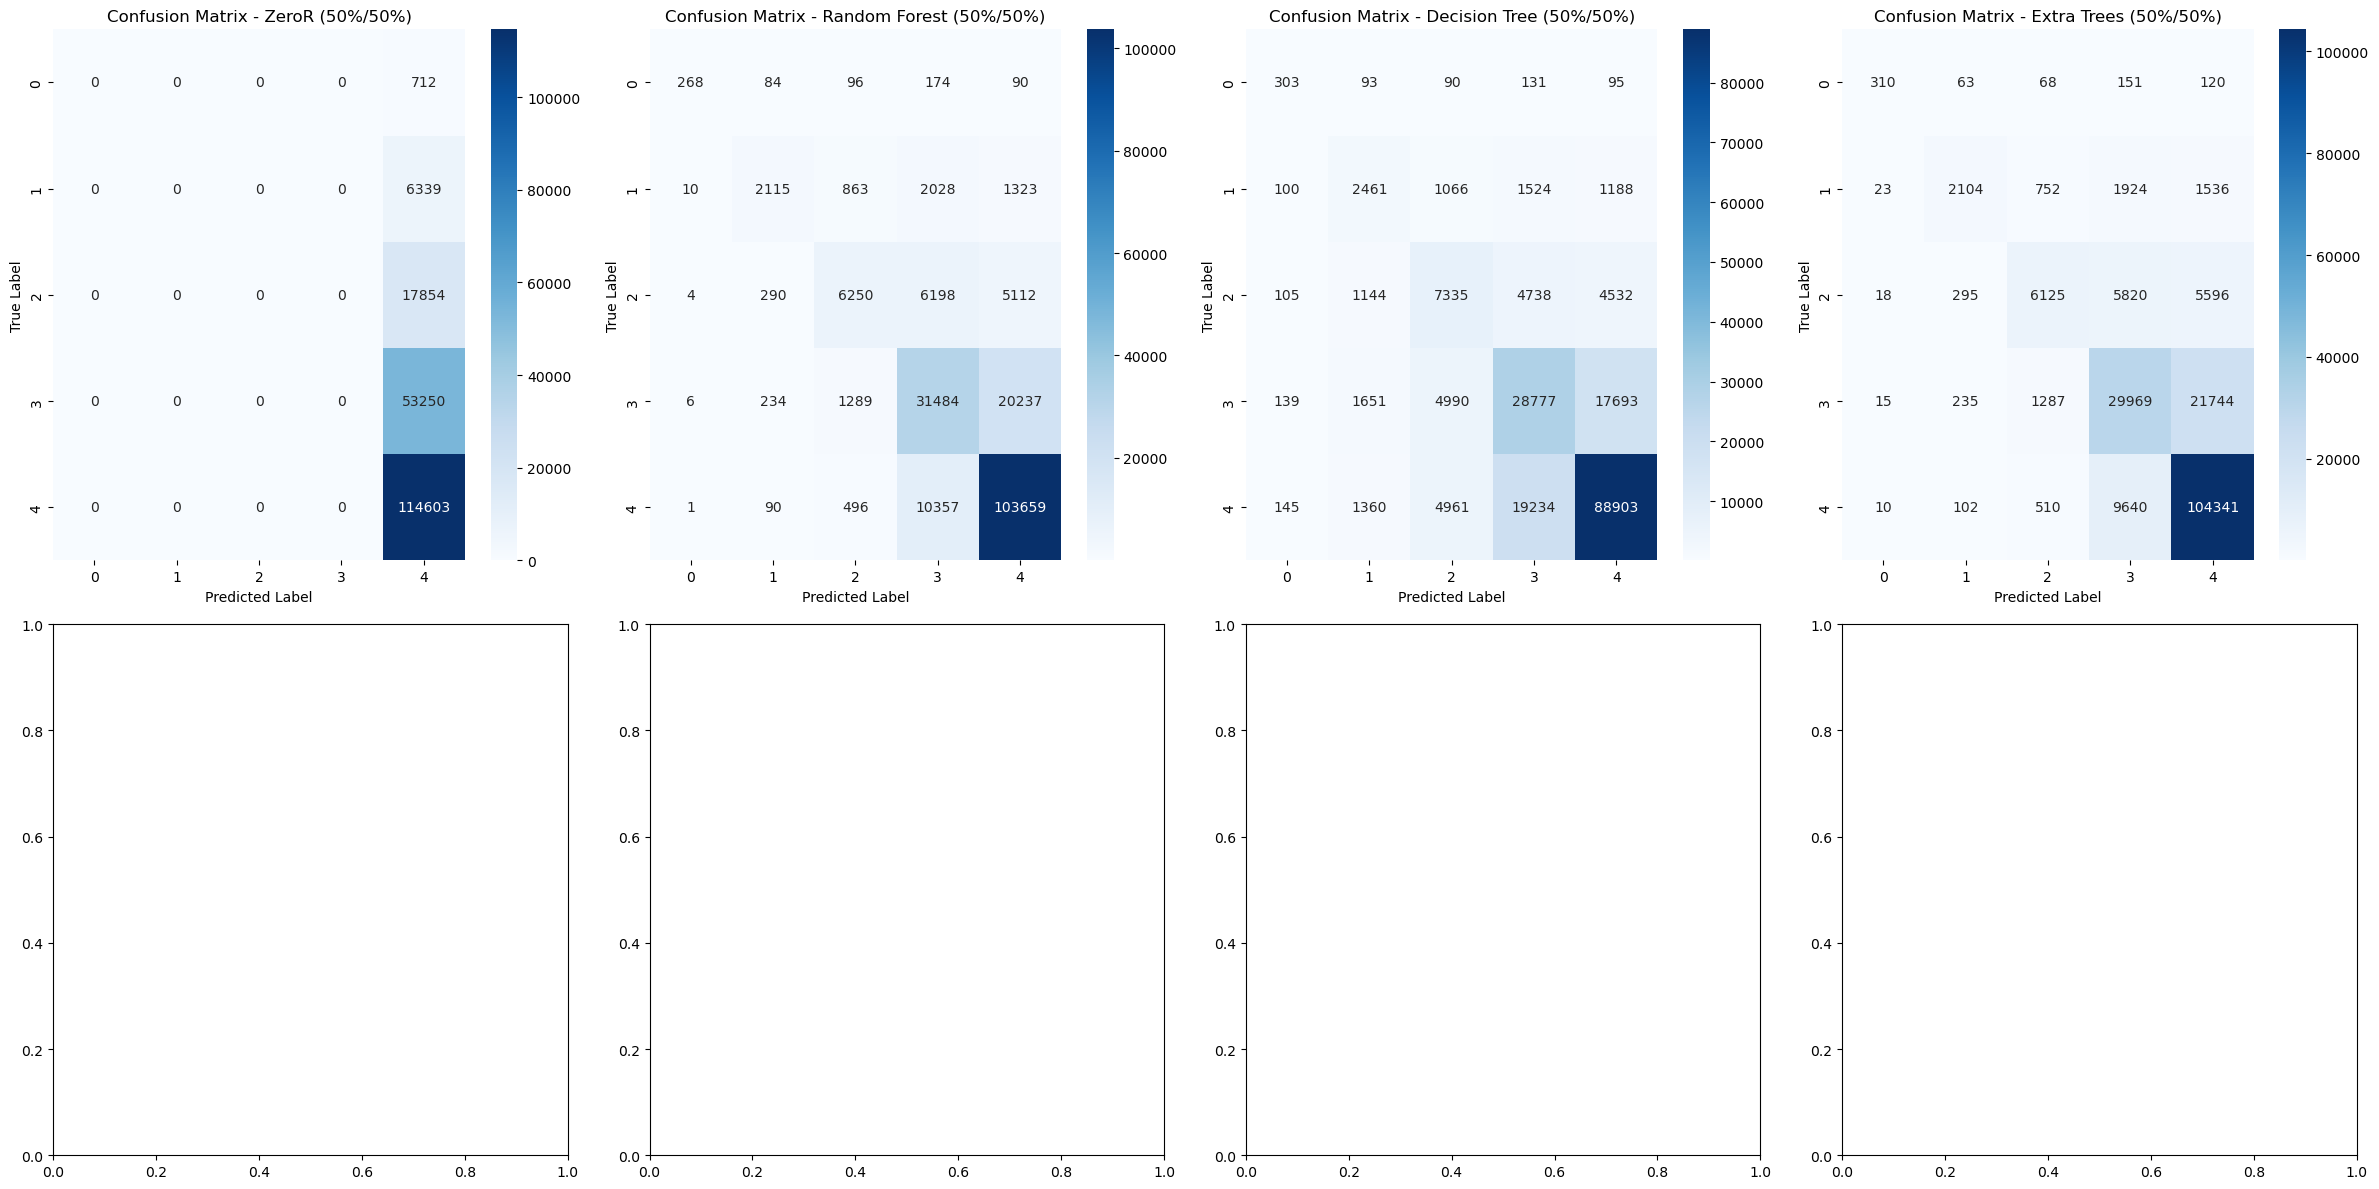

In [5]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create results directory if not exists
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Load the dataset
df = pd.read_csv("merged_data_step_3_sampled_v2.csv")  # Replace with your actual dataset path

# Define features and target
X = df.drop(columns=["Borrower Credit Score"])
y = df["Borrower Credit Score"]

# Define train-test split ratios
splits = [(0.90, 0.10), (0.80, 0.20), (0.70, 0.30), (0.50, 0.50)]

# Define models
models = {
    "ZeroR": DummyClassifier(strategy="most_frequent"),
    # "SGD Classifier": SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42), BAD 43%
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Logistic Regression": LogisticRegression(
    #     max_iter=1000, 
    #     random_state=42, 
    #     multi_class="multinomial",  # Ensures proper handling of multi-class classification
    #     solver="lbfgs"  # Use "saga" for large datasets
    #     ), BAD
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42), BAD
    # "KNN": KNeighborsClassifier(n_neighbors=5), BAD
    # "Support Vector Machine": SVC(kernel="rbf", probability=True, random_state=42), BAD 
}

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + np.diag(cm)  # True Negatives per class
    fp = np.sum(cm, axis=0) - np.diag(cm)  # False Positives per class
    specificity_per_class = tn / (tn + fp)  # Compute specificity per class
    return np.mean(specificity_per_class)  # Return the average specificity

# Iterate over each split
for train_size, test_size in splits:
    train_percent = int(train_size * 100)
    test_percent = int(test_size * 100)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    print(f"\nTraining/Testing Split: {train_percent}%/{test_percent}%\n")
    
    results = {}
    conf_matrices = {}
    
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=1)
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        spec = specificity_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        elapsed_time = time.time() - start_time
        
        results[name] = {
            "Accuracy": acc, 
            "Precision": prec, 
            "Recall": rec, 
            "F1-Score": f1, 
            "Specificity": spec,
            "Total Runtime (s)": elapsed_time,
        }
        conf_matrices[name] = cm
        print(f"Model: {name}\n Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, Specificity: {spec:.4f}")
        print("Time taken: {:.2f} seconds\n".format(elapsed_time))
        
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results).T
    results_file = f"{results_dir}/results_split_{train_percent}_{test_percent}.csv"
    results_df.to_csv(results_file, index=True)
    print(f"Results saved to {results_file}")

    # Save confusion matrices
    for name, cm in conf_matrices.items():
        cm_file = f"{results_dir}/conf_matrix_{train_percent}_{test_percent}_{name.replace(' ', '_')}.csv"
        pd.DataFrame(cm).to_csv(cm_file, index=False)
        print(f"Confusion Matrix for {name} saved to {cm_file}")
    
    # Plot confusion matrices
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    axes = axes.ravel()
    
    for i, (name, cm) in enumerate(conf_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name} ({train_percent}%/{test_percent}%)')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

In [ ]:

Training/Testing Split: 90%/10%

Model: ZeroR
 Accuracy: 0.5939, Precision: 0.9188, Recall: 0.2000, F1-Score: 0.1490, Specificity: 0.8000
Time taken: 0.04 seconds

Model: Random Forest
 Accuracy: 0.7939, Precision: 0.8449, Recall: 0.6179, F1-Score: 0.6962, Specificity: 0.9182
Time taken: 73.10 seconds

Model: Decision Tree
 Accuracy: 0.7306, Precision: 0.6092, Recall: 0.6168, F1-Score: 0.6129, Specificity: 0.9084
Time taken: 7.69 seconds

Model: Logistic Regression
 Accuracy: 0.5939, Precision: 0.9188, Recall: 0.2000, F1-Score: 0.1490, Specificity: 0.8000
Time taken: 7.76 seconds

Model: Gradient Boosting
 Accuracy: 0.6545, Precision: 0.4978, Recall: 0.3456, F1-Score: 0.3767, Specificity: 0.8626
Time taken: 449.73 seconds

Model: KNN
 Accuracy: 0.6098, Precision: 0.4258, Recall: 0.4075, F1-Score: 0.4153, Specificity: 0.8579
Time taken: 6.81 seconds

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Create results directory if not exists
cv_results_dir = "cv_results"
os.makedirs(cv_results_dir, exist_ok=True)

# Load the dataset
df = pd.read_csv("merged_data_step_3_sampled_v2.csv", low_memory=False) 

# Define features and target
X = df.drop(columns=["Borrower Credit Score"])
y = df["Borrower Credit Score"]

# Define models
models = {
    "ZeroR": DummyClassifier(strategy="most_frequent"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    # "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    # "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + np.diag(cm)  # True Negatives per class
    fp = np.sum(cm, axis=0) - np.diag(cm)  # False Positives per class
    specificity_per_class = tn / (tn + fp)  # Compute specificity per class
    return np.mean(specificity_per_class)  # Return the average specificity

# Define number of folds for cross-validation
folds_list = [5, 10, 20]

# Iterate over each number of folds
for num_folds in folds_list:
    print(f"\nPerforming {num_folds}-fold cross-validation\n")
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    results = {}
    conf_matrices = {}
    
    for name, model in models.items():
        start_time = time.time()
        y_pred = cross_val_predict(model, X, y, cv=kf)
        total_runtime = time.time() - start_time  # End timing
        
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred, average='weighted', zero_division=1)
        rec = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        spec = specificity_score(y, y_pred)
        cm = confusion_matrix(y, y_pred)
        
        results[name] = {
            "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1,
            "Specificity": spec, "Total Runtime (s)": total_runtime, "Total Runtime (min)": total_runtime / 60
        }
        
        conf_matrices[name] = cm
        
        print(f"Model: {name}\n Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, Specificity: {spec:.4f}")
        print("Time taken: {:.2f} seconds".format(total_runtime))
        print("Time taken: {:.2f} minutes\n".format(total_runtime / 60))
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results).T
    results_file = f"{cv_results_dir}/results_cv_{num_folds}_folds.csv"
    results_df.to_csv(results_file, index=True)
    print(f"Results saved to {results_file}")

    # Save confusion matrices
    for name, cm in conf_matrices.items():
        cm_file = f"{cv_results_dir}/conf_matrix_cv_{num_folds}_folds_{name.replace(' ', '_')}.csv"
        pd.DataFrame(cm).to_csv(cm_file, index=False)
        print(f"Confusion Matrix for {name} saved to {cm_file}")
    
    # Plot confusion matrices
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    axes = axes.ravel()
    
    for i, (name, cm) in enumerate(conf_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name} ({num_folds}-Folds CV)')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()
